# Windrose graphs

Based on: https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial

In [10]:
import pandas as pd
import numpy as np

# Note: You need to do: conda install windrose
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes

In [11]:
project_path = 'C:/Users/Jonathan/Documents/_Thesis_statistics/2.0 - Rafael Ktura/stats/'

graphs_path = project_path + '../graphs/'
data_path = project_path + '../data/'

ec_fn = data_path + 'Ketura_all_corr.csv'

## Load data

In [12]:
def load_temp(fn, index_col=False, silent=False):
    if (not silent):
        print('-', fn.split('/')[-1])
    temp = pd.read_csv(fn, index_col=index_col)
    temp.rename(columns={'date_time': 'timestamp'}, inplace=True)
    temp.rename(columns={'DateTime': 'timestamp'}, inplace=True)
    temp['timestamp'] = pd.to_datetime(temp['timestamp'], format='%Y-%m-%d %H:%M:%S', utc=True)
    return(temp)

In [37]:
print("Loading data")
print("------------")

ec = load_temp(ec_fn)

# Define seasons
ec['season'] = np.nan
ec.loc[ec['Month'] == 'March', 'season'] = 'Spring'
ec.loc[ec['Month'] == 'October', 'season'] = 'Autumn'
ec.loc[ec['Month'] == 'July', 'season'] = 'Summer'

ec.loc[ec['Ecosystem'] == 'Solar', 'Ecosystem'] = 'PV'

ec['location'] = ec['season'] + ' - ' + ec['Ecosystem']

print('Done...')
print(ec.columns.values)

Loading data
------------
- Ketura_all_corr.csv
Done...
['timestamp' 'Month' 'Year' 'Ecosystem' 'H' 'LE' 'PA_merge' 'RH'
 'TA_merge' 'VPD' 'H2O' 'PARin' 'PARout' 'SW_IN_merge' 'SW_OUT_merge'
 'LW_IN_merge_corr' 'LW_OUT_merge_corr' 'albedo' 'Wind_speed'
 'Wind_direction' 'Tsonic' 'uStar' 'season' 'location']


In [38]:
ec['location'].unique()

array(['Summer - Desert', 'Spring - Desert', 'Autumn - Desert',
       'Summer - PV', 'Spring - PV', 'Autumn - PV'], dtype=object)

1.14231
Preparing plot for:
(a) Spring - Desert
(b) Spring - PV
(c) Summer - Desert
(d) Summer - PV
(e) Autumn - Desert
(f) Autumn - PV
Saving...
Done...


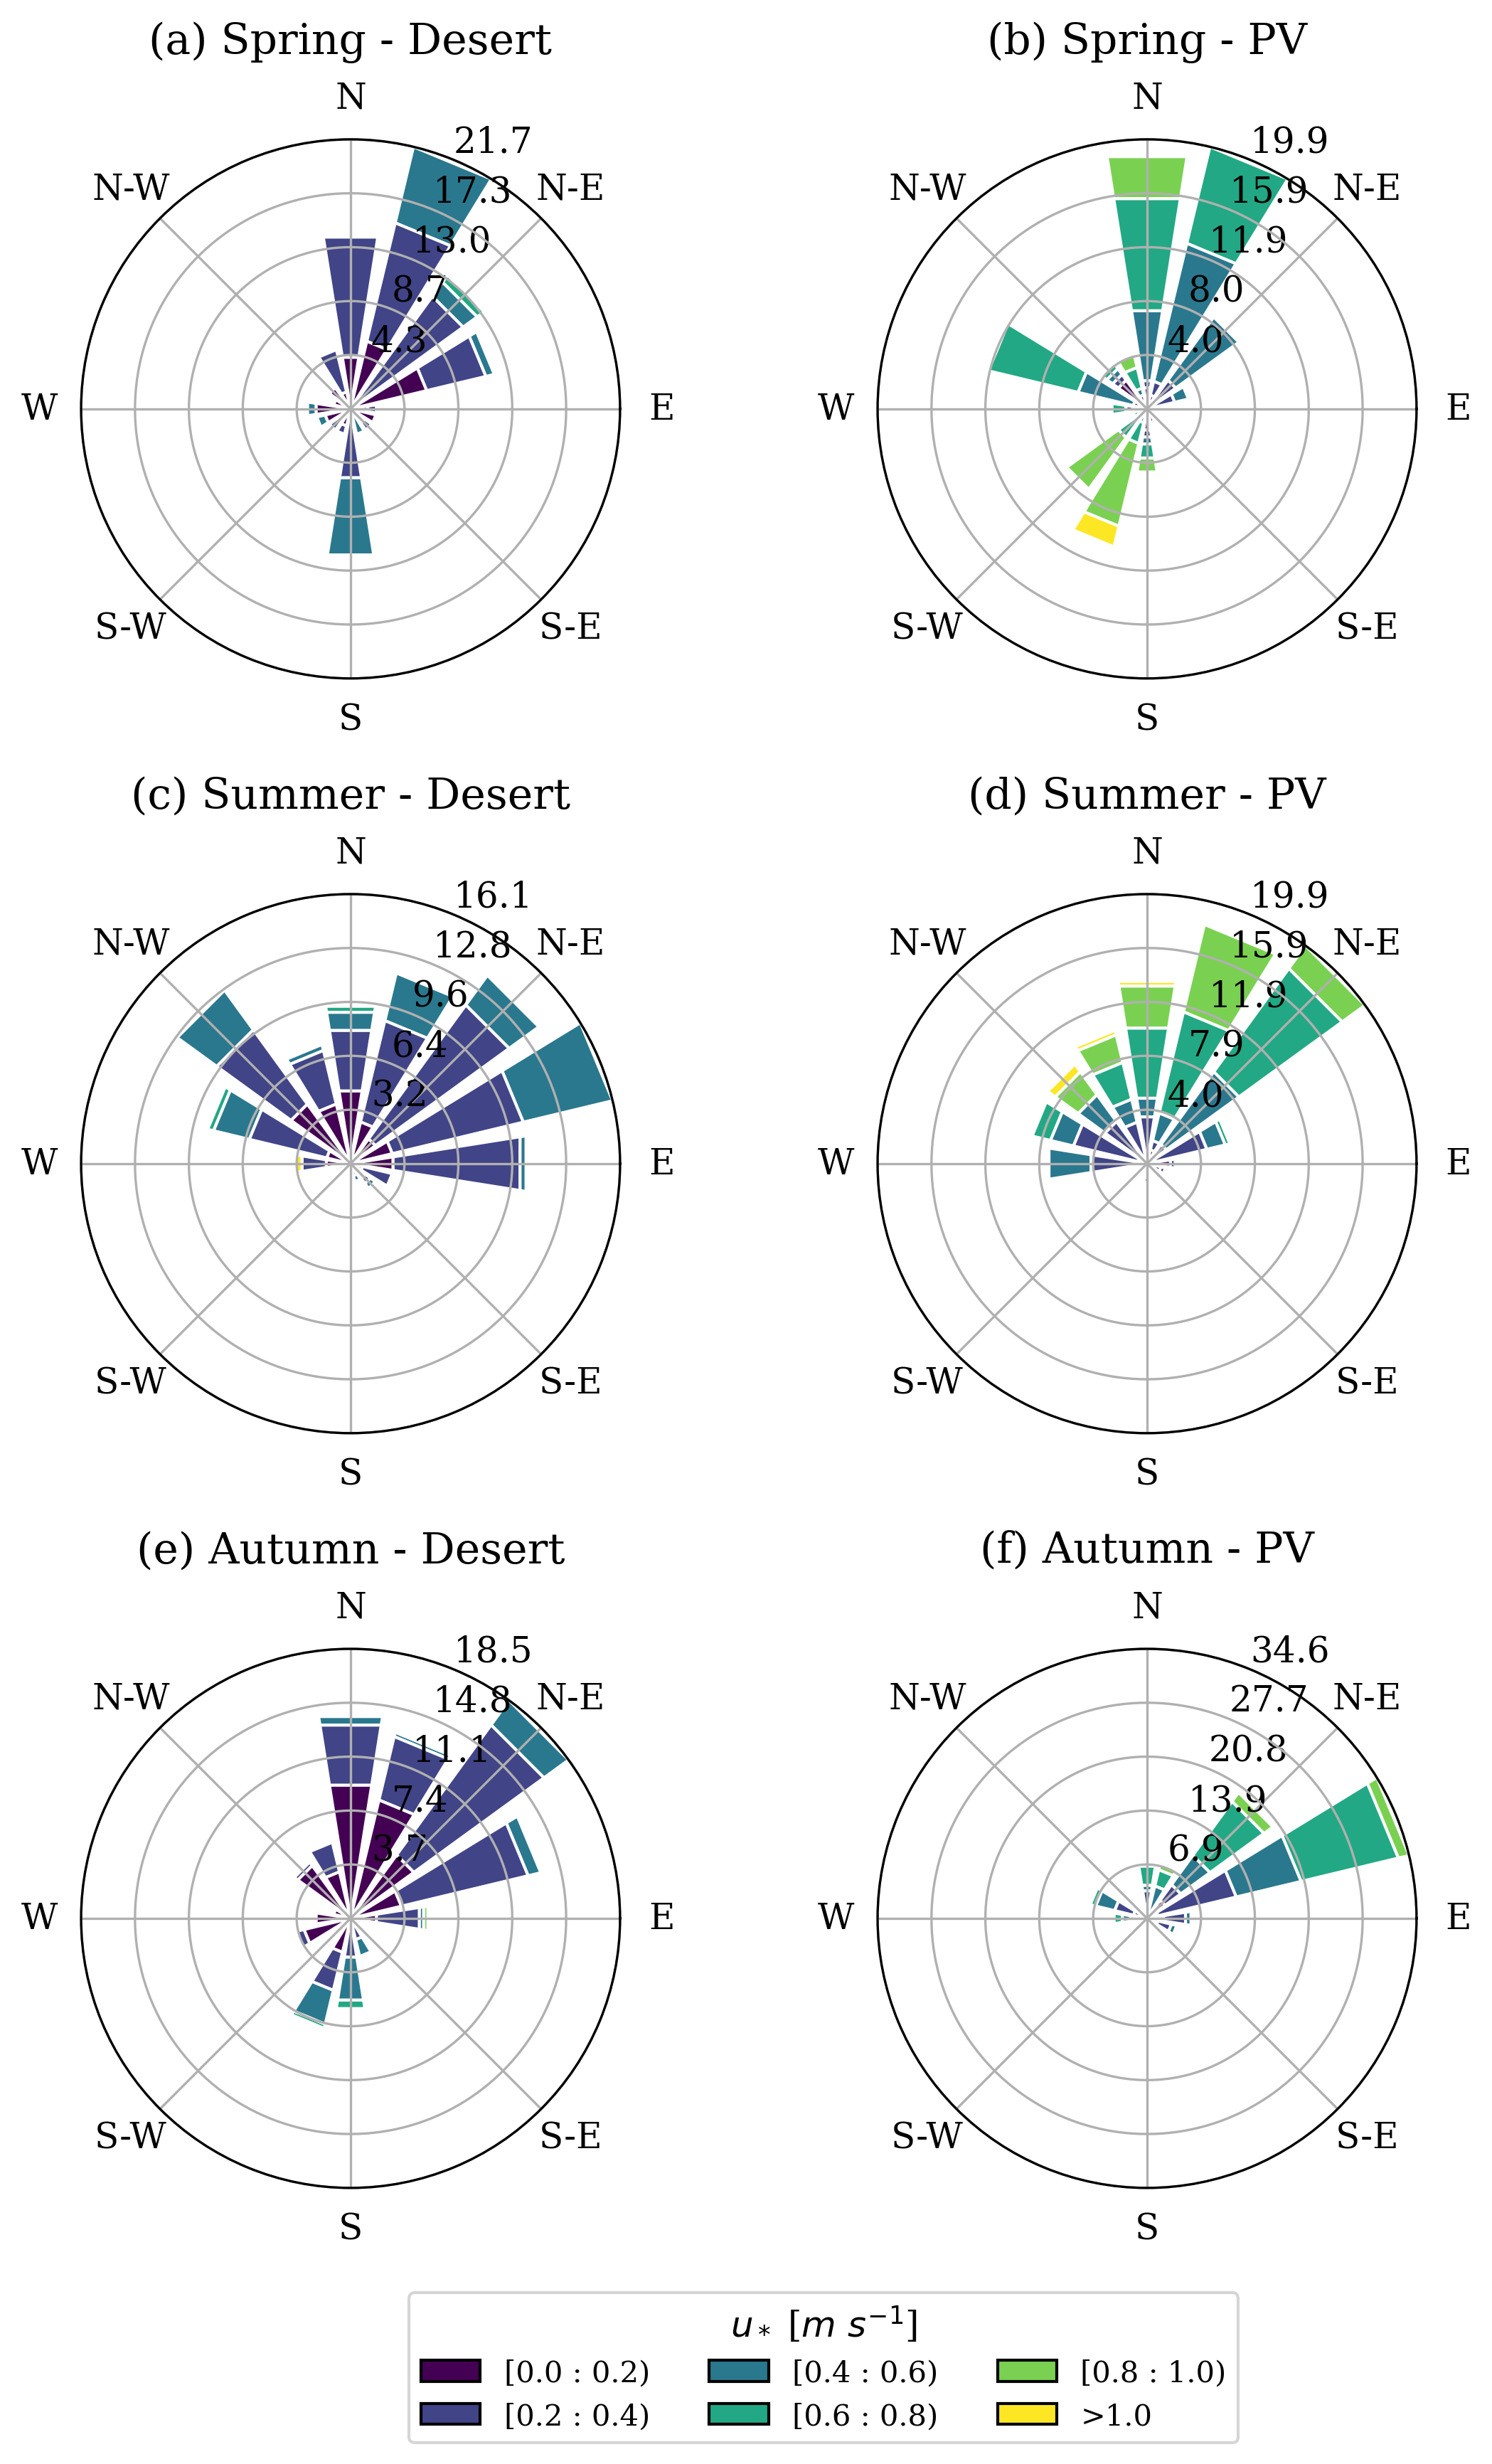

In [54]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'serif'

nrows, ncols = 3, 2
fig = plt.figure(figsize=(8, 12), dpi=300)
bins = np.arange(0.01, 1.2, 0.2)
print(max(ec['uStar']))

# Categories, in order, from ec['location'].unique():
categories = ['Spring - Desert',  'Spring - PV', 'Summer - Desert',  'Summer - PV', 'Autumn - Desert', 'Autumn - PV']

i = 1
print('Preparing plot for:')
for location in categories:
    print('  ('+ chr(ord('`')+i) + ') ' + location)
    temp = ec.loc[(ec['location'] == location)]
    ax = fig.add_subplot(nrows, ncols, i, projection="windrose")
    ax.bar(temp['Wind_direction'], temp['uStar'], bins=bins, normed=True, opening=0.8, edgecolor='white')
    ax.set_title('('+ chr(ord('`')+i) + ') ' + location, pad=20)
    i+=1

# Add legend
plt.legend(title='$u_*$ [$m~s^{-1}$]', prop={'size': 10}, fontsize = 'large', loc='lower center', bbox_to_anchor=(-0.1, -0.5), ncol=3)
# Adjust subplots
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)

# Save
print('Saving...')
plt.savefig(graphs_path + 'windroses.pdf')
plt.savefig(graphs_path + 'windroses.png', dpi=300)
print('Done...')

plt.show()

[None, None, None, None, None, None, None, None, None, None, None, None]

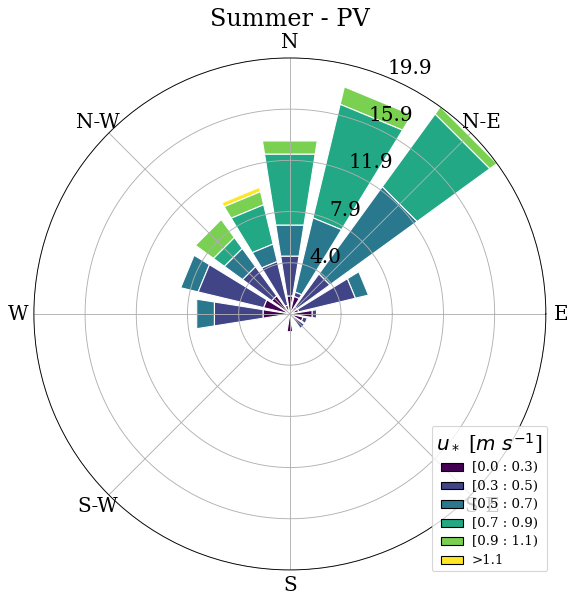

In [49]:
# Show a single season

temp = ec.loc[(ec['location'] == 'Summer - PV')]

plt.rcParams.update({'font.size': 18})
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.rcParams['font.family'] = 'serif'

ax = WindroseAxes.from_ax()
ax.bar(temp['Wind_direction'], temp['uStar'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc='lower right', title='$u_*$ [$m~s^{-1}$]', prop={'size': 10}, fontsize = 'large')
ax.set_title('Summer - PV')
# Change font size of legend
plt.setp(ax.get_legend().get_texts(), fontsize='12')

# Save
#plt.savefig(graphs_path + 'windroses.pdf')
#plt.savefig(graphs_path + 'windroses.png', dpi=300)